# A Brief Exploration of Country Difference Based on Stack Overflow Developer Survey 2018

As a multilingual software developer, I am always wondering how my job would be like if I start working in another country. Luckily, Stackoverflow's Developer Survey gave me the chance to explore and dig into the data, for answering the questions I've had in mind.  

There are three main aspects that I'd like to know regarding country differences:
* Technology preference
* Salary and cost of living
* Job satisfaction

In this notebook, I will try to answer these questions one by one, and hope this analysis can not only help me, but also others to decide which country to work next.

## Dataset
I've already downloaded and decompressed the survey data from this [link](https://insights.stackoverflow.com/survey/).  
I'll use pandas to read the csv file and do some cleaning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

from feature_selector import FeatureSelector

In [2]:
df_2018 = pd.read_csv('data/survey_results_public.csv', low_memory=False)
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


## Attributes of interest
First, for the whole analysis, I'd like to choose a subset of countries/areas that I'm interested in.  
There are two categories of these countries:  
* Top 10 countries where developers are most active in stackoverflow
* Countries that provides most job opportunies around my home country (Taiwan)

In [3]:
# Top 10 active countries
df_country_count = df_2018.groupby(['Country'])['Respondent'].count().sort_values(ascending=False)
df_country_count.head(10)

Country
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Name: Respondent, dtype: int64

The top 10 active countries are shown above. And the countries near my geographical position are:
* China
* Singapore
* Japan
* Hong Kong
* Taiwan
* South Korea  
How following is the country list for the analysis  

Take a look on how many entries in these countries:

In [4]:
df_country_count.loc[['Taiwan', 'China', 'Japan', 'Singapore', 'Hong Kong (S.A.R.)', 'South Korea']]

Country
Taiwan                 207
China                 1037
Japan                  361
Singapore              376
Hong Kong (S.A.R.)     219
South Korea            169
Name: Respondent, dtype: int64

In [5]:
# The counties list used in this analysis
countries_top10 = [
    # Top 10 active countries
    'United States',
    'India', 'Germany',
    'United Kingdom',
    'Canada',
    'Russian Federation',
    'France',
    'Brazil',
    'Australia',
    'Netherlands',
    'Spain',
]

countries_selected = [
    # Countries nearby
    'China',
    'Singapore',
    'Japan',
    'Hong Kong (S.A.R.)',
    'Taiwan',
    'South Korea'
]

Also, there are too many features in this dataset.  
Following are the attributes which may be related to my questions, and I'll only use these them for the analysis.

In [6]:
# Attributes list
target_attributes = [
    # Background
    'Country',
    'YearsCoding',
    'CompanySize',
    'DevType',    
    'YearsCodingProf',
    'JobSatisfaction',
    'ConvertedSalary',
    # Technologies
    'CommunicationTools',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'DatabaseDesireNextYear',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'OperatingSystem',
    'Methodology',
]

Obtain the subset of original and save it to a csv for further analysis

In [7]:
# Subset
df_2018 = df_2018[df_2018.Country.isin(countries_top10+countries_selected)] # filter by countries
df_2018 = df_2018[target_attributes] # filter by attributes
df_2018.head()

,Country,YearsCoding,CompanySize,DevType,YearsCodingProf,JobSatisfaction,ConvertedSalary,CommunicationTools,LanguageWorkedWith,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Methodology
1,United Kingdom,30 or more years,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,18-20 years,Moderately dissatisfied,70841.0,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Django,Linux-based,NaN
2,United States,24-26 years,20 to 99 employees,Engineering manager;Full-stack developer,6-8 years,Moderately satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,18-20 years,100 to 499 employees,Full-stack developer,12-14 years,Neither satisfied nor dissatisfied,NaN,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,NaN,Windows,Agile;Kanban;Scrum
5,United Kingdom,6-8 years,10 to 19 employees,Back-end developer;Database administrator;Fron...,3-5 years,Moderately satisfied,41671.0,Confluence;Jira;Office / productivity suite (M...,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,PostgreSQL,Linux,Angular;Node.js,Linux-based,Agile
6,United States,9-11 years,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,0-2 years,Slightly satisfied,120000.0,Confluence;Office / productivity suite (Micros...,JavaScript;HTML;CSS,MongoDB,NaN,Linux,Node.js;React,MacOS,Agile;Scrum


In [8]:
# Save as csv
df_2018.to_csv('data/survey_modified.csv', index=False)

In [9]:
# Delete unnecessary objects
del df_2018
del df_country_count
del countries_top10
del countries_selected
del target_attributes

Read the modified csv back for analysis

In [10]:
df = pd.read_csv('data/survey_modified.csv', low_memory=False)
df.head()

,Country,YearsCoding,CompanySize,DevType,YearsCodingProf,JobSatisfaction,ConvertedSalary,CommunicationTools,LanguageWorkedWith,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Methodology
0,United Kingdom,30 or more years,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,18-20 years,Moderately dissatisfied,70841.0,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Django,Linux-based,NaN
1,United States,24-26 years,20 to 99 employees,Engineering manager;Full-stack developer,6-8 years,Moderately satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,18-20 years,100 to 499 employees,Full-stack developer,12-14 years,Neither satisfied nor dissatisfied,NaN,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,NaN,Windows,Agile;Kanban;Scrum
3,United Kingdom,6-8 years,10 to 19 employees,Back-end developer;Database administrator;Fron...,3-5 years,Moderately satisfied,41671.0,Confluence;Jira;Office / productivity suite (M...,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,PostgreSQL,Linux,Angular;Node.js,Linux-based,Agile
4,United States,9-11 years,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,0-2 years,Slightly satisfied,120000.0,Confluence;Office / productivity suite (Micros...,JavaScript;HTML;CSS,MongoDB,NaN,Linux,Node.js;React,MacOS,Agile;Scrum


## Data Mining
In the following sections, I will use the suitable subset of data to answer three questions regarding country difference of developers.  
The exploration of the answers to each question will follow the [CRISP-DM(Cross-Industry Standard Process for Data Mining) ](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process.

### Question 1. What is the relative popularity of technologies(languages, frameworks, and platforms) among different countries?

#### 1. Business Understaning
The relative popularity of technologies among different countries are very important for developers who want to work abroad. The most valuable skills he/she already have might be irrelevant in another country.  

In this section, I will  summarize the technologies used by individual respondents, and then calculate the relative use percentages.

#### 2. Data Understaning
To analyze the technology usage, I will mainly focus on the following three columns:
* LanguageWorkedWith
* FrameworkWorkedWith
* PlatformWorkedWith

Let's first take a look on theses columns.

In [11]:
# make a copy for Q1
df_Q1 = df.copy()

In [12]:
# What the data look like
df_Q1[['LanguageWorkedWith', 'FrameworkWorkedWith', 'PlatformWorkedWith']].sample(10)

,LanguageWorkedWith,FrameworkWorkedWith,PlatformWorkedWith
9255,Assembly;C;C++;C#;F#;Haskell;Java;JavaScript;P...,NaN,NaN
62566,NaN,NaN,NaN
49406,CoffeeScript;Java;JavaScript;Ruby;HTML;CSS,Angular;Node.js;React,WordPress
47941,C++;Python,NaN,Amazon Echo;iOS;Linux;Mac OS;Windows Desktop o...
49076,C++;Perl;Python;SQL;Bash/Shell,NaN,NaN
24677,NaN,NaN,NaN
1330,NaN,NaN,NaN
11006,C;C++;Java;Objective-C;PHP;Swift;HTML,NaN,Android;Google Cloud Platform/App Engine;iOS;F...
55888,C++;Java;JavaScript;Python;Swift;HTML;CSS;Bash...,Django,Android;AWS;Linux;Firebase
34785,C++;JavaScript;Python;SQL;HTML;CSS;Bash/Shell,NaN,Windows Desktop or Server


In [13]:
# The missing values
df_Q1[['LanguageWorkedWith', 'FrameworkWorkedWith', 'PlatformWorkedWith']].isnull().mean()

LanguageWorkedWith     0.195546
FrameworkWorkedWith    0.471111
PlatformWorkedWith     0.324516
dtype: float64

Clearly, these data are not easy to work with since each cell have multiple values (e.g. C++/C#/... etc.).  
Also, there are missing values in the responses.

#### 3. Data Preparation
A way to process the data is to simply count the occurrence of every technology based a certain country, then divide the number by the sum of all technology occurrence. This should give us approximate values of relative importances of certain technologies in a specific country. Also, since what we want is the popularity percentage of technologies, ignoring the missing values should have minimal effects.

In [14]:
# Count the technology usage in each country, return a nested dictionary 
# in the form: {countyname: {tech1: count1, tech2: count2, ....}, .......}
def getStatistics(df, tech):
    """ Given the dataframe, counting the technology usage for each country
    
    Args:
        df: dataframe
        tech: Language, Database, Platform, or Framework
    
    Returns:
        A dictionary containing the technology usage for each country
        
    """
    statistics = {}
    WorkedWith = tech + 'WorkedWith'
    for index, row in df[['Country', WorkedWith]].iterrows():
        # add countries to the list if not exists
        if row['Country'] not in statistics:
            statistics[row['Country']] = {}
        # Technology count
        if row[WorkedWith] is not np.nan:
            for tar in row[WorkedWith].split(';'):
                statistics[row['Country']][tar] = statistics[row['Country']].get(tar, 0) + 1 

    return statistics

In [15]:
# Counting the tech usage
language_statistics = getStatistics(df_Q1, 'Language')
platform_statistics = getStatistics(df_Q1, 'Platform')
framework_statistics = getStatistics(df_Q1, 'Framework')

What are these statistic objects look like?

In [16]:
# keys: the countries 
language_statistics.keys()

dict_keys(['United Kingdom', 'United States', 'India', 'Spain', 'Netherlands', 'Australia', 'Germany', 'Russian Federation', 'France', 'China', 'Japan', 'Brazil', 'Canada', 'Hong Kong (S.A.R.)', 'South Korea', 'Singapore', 'Taiwan'])

In [17]:
# values: the technology counts
language_statistics['United States'] # for the US

{'Assembly': 1154,
 'Bash/Shell': 9069,
 'C': 3408,
 'C#': 6383,
 'C++': 4058,
 'CSS': 11979,
 'Clojure': 349,
 'Cobol': 112,
 'CoffeeScript': 819,
 'Delphi/Object Pascal': 179,
 'Erlang': 251,
 'F#': 335,
 'Go': 1827,
 'Groovy': 962,
 'HTML': 12479,
 'Hack': 65,
 'Haskell': 507,
 'Java': 7155,
 'JavaScript': 13126,
 'Julia': 107,
 'Kotlin': 685,
 'Lua': 735,
 'Matlab': 884,
 'Objective-C': 1348,
 'Ocaml': 136,
 'PHP': 3968,
 'Perl': 1029,
 'Python': 8324,
 'R': 1486,
 'Ruby': 2693,
 'Rust': 637,
 'SQL': 10597,
 'Scala': 930,
 'Swift': 1632,
 'TypeScript': 3269,
 'VB.NET': 1161,
 'VBA': 925,
 'Visual Basic 6': 533}

Now we have technology usage counts.  
Next, I will calculate the percentage and turn the data into a pandas dataframe for visualization.  

The NaNs (missing values) is this calcuation will mean that there are no usage in the specific technoloy. I will fill NaN values with 0.

In [18]:
# Utility function
# Return a dataframe of relative usage of technologies among the selected countries
def dfWithRelativePreference(statistics, countries):
    """Given the technology usage dictionary, return a dataframe that display
       the relative usage of technologies compared to the entire dataset
       
       Args:
            statistics: statistic object calculated by getStatistics function
            countries: countries to be display and visualized
            
       Returns:
            relative usage percentage dataframe
            
    """
    df = pd.DataFrame(statistics)
    df['total_along_row']  = df.sum(axis=1)
    df = (df/df.sum()*100).fillna(0) # normalize and fill NaN
    df = df[countries+['total_along_row']]
    for country in countries:
        df[country] = df[country] - df['total_along_row']
    return df.drop(['total_along_row'], axis=1)

In [19]:
# Due to width limitation of the notebook, I only compare a few countries
analysis_countries = ['China',
    'Singapore',
    'Japan',
    'Hong Kong (S.A.R.)',
    'Taiwan',
    'South Korea',
    'United States']

#### 4. Results evaluation
Below are the visualizations and summaries of the technology usage.

##### (a) Languages

In [20]:
# Create and display language dataframe with colored bar
df_lang = dfWithRelativePreference(language_statistics, analysis_countries)
df_lang.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
Assembly,-0.19981,-0.0734745,-0.125636,-0.490904,-0.17818,0.418905,-0.125788
Bash/Shell,-0.636197,-0.496104,0.40273,-0.457538,-0.311329,-2.02405,1.05045
C,2.0356,-0.682866,0.58869,-1.46098,0.604396,3.22353,-0.775777
C#,-0.839762,-0.147304,-0.929491,-0.21623,0.25304,-2.21132,0.23367
C++,1.54697,-0.244905,0.516779,-0.472072,1.13475,2.01351,-0.49467
CSS,-1.7978,-0.249115,-0.965005,0.178031,-0.557073,-1.63878,-0.0588927
Clojure,-0.0922122,0.0476342,0.0339075,-0.229528,-0.0940264,-0.229528,0.0731714
Cobol,0.0902985,0.0506224,0.0950735,-0.0248482,0.0198267,0.193444,-0.0185334
CoffeeScript,-0.120257,-0.123074,0.118399,0.160079,0.381977,-0.411973,0.143813
Delphi/Object Pascal,-0.192403,-0.163421,-0.0662832,0.0335877,-0.194217,0.28852,-0.174466


##### Insight: The relative popularity of programming languages
* The usage of Ruby and Objective-C is higher in Japan.
* Python and Java are popular in China.
* South Korea has higher C and Java usage.

##### (b) Frameworks

In [21]:
# Create and display framework dataframe with colored bar
df_plat = dfWithRelativePreference(platform_statistics, analysis_countries)
df_plat.style.bar(align='mid', color=['#feff9f', '#0078ff'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
AWS,-4.29308,0.824328,1.85074,0.348423,-2.37412,0.538707,1.76019
Amazon Echo,-0.717819,-0.8457,-0.765941,-0.890863,-0.0985135,-0.664094,0.614032
Android,1.88197,1.72703,-1.21673,1.02114,2.79874,3.46676,-2.39111
Apple Watch or Apple TV,-0.386514,-0.000689784,-0.0755724,-0.138266,-0.407469,-0.398714,0.137516
Arduino,-1.79445,0.0399634,-0.474115,-0.226836,-0.967415,1.81408,-0.120415
Azure,-1.76834,-0.246427,-0.635817,-0.513226,-1.25381,-2.07591,0.425103
Drupal,-0.390385,-0.456725,-0.766008,-0.0808052,-0.140749,-1.01538,0.00832477
ESP8266,-0.259455,-0.0298811,0.0199245,0.0194584,-0.728205,0.172696,-0.0534351
Firebase,-3.04496,1.66087,0.223823,2.15218,0.484105,3.0441,-1.19575
Gaming console,-0.158506,-0.471006,0.152435,-0.0971741,-0.471006,0.129595,0.0835996


##### Insight: The relative popularity of platforms
* China's adoption rates of top cloud providers(AWS, Azure, etc) are lower.
* Android is popular in South Korea, while Mac OS and iOS are popular in Japan.

##### (c) Platforms

In [22]:
# Create and display platform dataframe with colored bar
df_frame = dfWithRelativePreference(framework_statistics, analysis_countries)
df_frame.style.bar(align='mid', color=['#bdc3c7', '#9b59b6'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
.NET Core,-4.67345,-2.60211,-2.57783,-4.69362,1.61607,-6.66892,0.861511
Angular,-8.96572,-0.388095,-6.23786,-3.67785,-2.32132,-9.35687,-0.695624
Cordova,-1.63746,0.180147,-1.10213,2.1845,1.07786,0.579566,-1.30597
Django,2.41337,0.0680828,-0.0916422,-1.80556,3.38855,1.15741,-0.0881503
Hadoop,3.15267,2.03476,0.392148,0.0521897,-0.733174,1.1633,0.0761674
Node.js,-3.78514,-2.23123,0.179977,4.43544,0.245342,2.08976,0.968512
React,-4.06292,0.197306,1.87186,1.22127,-4.92777,-2.23552,1.74321
Spark,2.27664,1.80721,-0.204047,0.783245,-1.34527,0.536331,0.201357
Spring,8.98402,1.80284,2.63149,-1.92265,-2.19485,10.2996,-1.88369
TensorFlow,5.35735,0.526569,4.74906,1.50696,3.78273,3.35881,0.178766


##### Insight: The relative popularity of frameworks
* Framework prevalence seems to have correlation with programming languages.
* A substantial more portion of Singapore developers use Big data tools such as Hadoop and Spark.
* Developers in China, Japan, and Taiwan seem to focus on AI applications or algorithms based on the Tensorflow usage.

In [23]:
# Delete unnecessary objects
del df_Q1
del language_statistics
del platform_statistics
del framework_statistics
del analysis_countries
del df_lang
del df_plat
del df_frame

### Q2. What are the converted salaries in each country along with the cost of living?

#### 1. Business Understaning
I believe salary is one of the most important motivating factors for people.  But salary alone cannot tell us about the qualiy of life if costs of living are also high in those areas.  

Therefore, in this section, I will compare salaries of different countries along with their costs of living.

#### 2. Data Understadning
The ConvertedSalary column (USD) in the dataset provides a way to compare salaries in different countries. 
However, there are no costs of living metrics in these dataset. I'll have to find the data from other sources.

In [24]:
# make a copy for Q2
df_Q2 = df.copy()

In [25]:
# Assess: Check missing
df_Q2['ConvertedSalary'].isnull().mean()

0.48610059655391696

It seems the column have half of data missing.
Let's drop the missing rows and see what are the resulting dataframe.

In [26]:
# Drop the records without salary
df_Q2 = df_Q2.dropna(subset=['ConvertedSalary'])

In [27]:
# Number of salary records reported by each country 
salary_data_counts = df_Q2[['ConvertedSalary', 'Country']].groupby(['Country']).count()
salary_data_counts

,ConvertedSalary
Country,
Australia,1180
Brazil,1151
Canada,1983
China,270
France,1447
Germany,3362
Hong Kong (S.A.R.),89
India,4091
Japan,171


There are countries with less than 100 salary records. Those countries should be denoted as such in the visualization.  

#### 3. Data preparation
Let's first check the **median salary** for each country.  
The reason I use median rather than average is because median is less affected by outliers such people with extremely high-paying jobs.  
Median salary, in my opinion, better captures typical salary level in a given country.

In [28]:
# calculate median salary for each country
df_country_salary = df_Q2.groupby(['Country'])['ConvertedSalary'].median().reset_index('Country').sort_values(by='ConvertedSalary', ascending=False)
df_country_salary = df_country_salary.reset_index().drop(['index'], axis=1)
df_country_salary

,Country,ConvertedSalary
0,United States,100000.0
1,Australia,79973.0
2,Canada,64417.0
3,United Kingdom,62507.0
4,Germany,61194.0
5,Netherlands,55075.0
6,Japan,54023.0
7,Singapore,49968.0
8,France,48955.0
9,South Korea,46715.0


Next, I manually include the costs of living and rent data from [NUMBEO](https://www.numbeo.com/cost-of-living/rankings_by_country.jsp), a crowd-source database.

In [29]:
# Cost of Living Index by Contries 2019
# https://www.numbeo.com/cost-of-living/rankings_by_country.jsp
df_cost = pd.DataFrame({'CostOfLivingAndRent': 
                        [
                            55.06, # US
                            54.52, # Australia
                            47.39, # Canada
                            47.66, # UK
                            48.04, # Germany
                            55.58, # Netherland
                            56.75, # Japan
                            61.77, # Singapore
                            51.51, # France
                            50.66, # South Korea
                            77.51, # Hong Kong
                            38.39, # Spain
                            42.33, # Taiwan
                            28.73, # China
                            24.55, # Russia
                            27.75, # Brazil
                            15.37 # India
                        ]})
df_country_salary_and_cost = df_country_salary.join(df_cost)
df_country_salary_and_cost.head()

,Country,ConvertedSalary,CostOfLivingAndRent
0,United States,100000.0,55.06
1,Australia,79973.0,54.52
2,Canada,64417.0,47.39
3,United Kingdom,62507.0,47.66
4,Germany,61194.0,48.04


In [30]:
# Countries with less than 100 records 
dict_less_100 = (salary_data_counts < 100)['ConvertedSalary'].to_dict()
dict_less_100 

{'Australia': False,
 'Brazil': False,
 'Canada': False,
 'China': False,
 'France': False,
 'Germany': False,
 'Hong Kong (S.A.R.)': True,
 'India': False,
 'Japan': False,
 'Netherlands': False,
 'Russian Federation': False,
 'Singapore': False,
 'South Korea': True,
 'Spain': False,
 'Taiwan': True,
 'United Kingdom': False,
 'United States': False}

In [31]:
# Create new column
df_country_salary_and_cost['LessThan100Records'] = df_country_salary_and_cost['Country'].map(dict_less_100)
df_country_salary_and_cost

,Country,ConvertedSalary,CostOfLivingAndRent,LessThan100Records
0,United States,100000.0,55.06,False
1,Australia,79973.0,54.52,False
2,Canada,64417.0,47.39,False
3,United Kingdom,62507.0,47.66,False
4,Germany,61194.0,48.04,False
5,Netherlands,55075.0,55.58,False
6,Japan,54023.0,56.75,False
7,Singapore,49968.0,61.77,False
8,France,48955.0,51.51,False
9,South Korea,46715.0,50.66,True


#### 4. Results evaluation
Below is the visualization and summaries for salaries and costs of living.

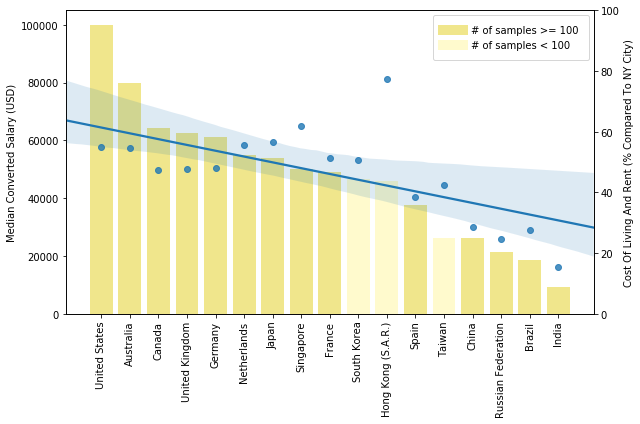

In [32]:
# Visualization

# Figure
fig, ax1 = plt.subplots(figsize=(9, 6))

# Bar color map
color_map = {False: 'khaki', True: 'lemonchiffon'}

# Bar charts for converted salaries
x_pos = np.arange(len(df_country_salary_and_cost['Country']))
ax1.bar(x_pos, df_country_salary_and_cost['ConvertedSalary'], color=df_country_salary_and_cost['LessThan100Records'].map(color_map))
ax1.set_ylabel('Median Converted Salary (USD)')
plt.xticks(x_pos, df_country_salary_and_cost['Country'], rotation='vertical');

# Points and regression line for costs of living
ax2 = ax1.twinx()
sns.regplot(x_pos, df_country_salary_and_cost['CostOfLivingAndRent'].values, ax=ax2)
ax2.set_ylabel('Cost Of Living And Rent (% Compared To NY City)')
ax2.set_ylim((0,100))
plt.tight_layout()

# Legned for color ref: https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html
custom_lines = [Line2D([0], [0], color='khaki', lw=10),
                Line2D([0], [0], color='lemonchiffon', lw=10)]
ax2.legend(custom_lines, ['# of samples >= 100', '# of samples < 100'], borderpad=1)

# Save the plot 
# plt.savefig('salary_cost.png')

##### Insight:
* Converted salaries and costs of living seem to be positvely correlated.
* Singapore, Hong Kong, and Taiwan have lower salary levels compared to countries with similar or even smaller costs of living.
* The United States and Australia have significantly higher salaries compared to Japan and the Netherlands, which have similar costs of living.
* South Korea, Hong Kong, and Taiwan have less samples compared to other countries.

In [33]:
del df_Q2
del salary_data_counts
del df_country_salary
del df_cost
del df_country_salary_and_cost
del dict_less_100
del color_map

### Q3. What are the factors for job satisfaction?
#### 1. Business Understaning
Finally, let's see what factors contribute to each country's job satisfaction, which should be able to capture the overall consideration for landing a job.
#### 2. Data Understaning
There are one target variable: Job Satisfaction, and other features variables such as Country, CompanySize, and so on.  
Let's take a look on those variables.

In [34]:
# make a copy for Q3
df_Q3 = df.copy()

In [35]:
# Job Satisfaction
df_Q3['JobSatisfaction'].unique()

array(['Moderately dissatisfied', 'Moderately satisfied',
       'Neither satisfied nor dissatisfied', 'Slightly satisfied', nan,
       'Extremely satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

The Job Satisfaction column contains categorial values that are ordinal. 

In [36]:
df_Q3['JobSatisfaction'].isnull().mean()

0.28569481876268055

There are about 29% data missing in the Job Satisfaction column.

In [37]:
# Other features
df_Q3.drop('JobSatisfaction', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66046 entries, 0 to 66045
Data columns (total 14 columns):
Country                   66046 non-null object
YearsCoding               63123 non-null object
CompanySize               49633 non-null object
DevType                   61847 non-null object
YearsCodingProf           52679 non-null object
ConvertedSalary           33941 non-null float64
CommunicationTools        39162 non-null object
LanguageWorkedWith        53131 non-null object
DatabaseWorkedWith        44555 non-null object
DatabaseDesireNextYear    38325 non-null object
PlatformWorkedWith        44613 non-null object
FrameworkWorkedWith       34931 non-null object
OperatingSystem           51713 non-null object
Methodology               40435 non-null object
dtypes: float64(1), object(13)
memory usage: 7.1+ MB


Most of the features are categorical. For eliminating features after one-hot encoding, I will transform the YearsCoding and YearsCodingProf into numerical forms in the following section.

#### 3. Data Preparation

##### Job Satisfaction
For easy visualization and comparsion of the satisfaction, I assume the level of satisfaction can be modeled as numberical values, with successive level of satisfaction differed by 1

In [38]:
# Map satisfaction level to numberic form
satisfaction_to_val = {
    'Extremely dissatisfied': 1,
    'Moderately dissatisfied': 2,
    'Slightly dissatisfied': 3,
    'Neither satisfied nor dissatisfied': 4,
    'Slightly satisfied': 5,
    'Moderately satisfied': 6,
    'Extremely satisfied': 7
}

In [39]:
# Dropna and convert to numerical form
df_Q3 = df_Q3.dropna(subset=['JobSatisfaction'])
df_Q3['JobSatisfactionVal']=df_Q3['JobSatisfaction'].map(satisfaction_to_val) 
df_Q3 = df_Q3.drop('JobSatisfaction', axis=1)

Take a look on average job satisfaction distribution by country.

In [40]:
# Other features' missing values
df_Q3.drop('JobSatisfactionVal', axis=1).isnull().mean()

Country                   0.000000
YearsCoding               0.000551
CompanySize               0.110584
DevType                   0.007101
YearsCodingProf           0.000000
ConvertedSalary           0.316659
CommunicationTools        0.172881
LanguageWorkedWith        0.112597
DatabaseWorkedWith        0.225237
DatabaseDesireNextYear    0.332726
PlatformWorkedWith        0.232486
FrameworkWorkedWith       0.379994
OperatingSystem           0.118681
Methodology               0.256629
dtype: float64

There are missing values ranging from 0-38%.

For ease of analysis, I want to replace categorical values in `YearsCoding` and `YearsCodingProf` column with numerical values

In [41]:
# Convert YearsCoding and YearsCodingProf into numerical forms
df_Q3= df_Q3.dropna(subset=['YearsCoding', 'YearsCodingProf'])

year_to_num = {
    '18-20 years': 19,
    '3-5 years': 4,
    '0-2 years': 1,
    '21-23 years': 22,
    '12-14 years': 13,
    '6-8 years': 7,
    '9-11 years': 10,
    '15-17 years':16,
    '30 or more years': 35,
    '24-26 years':25,
    '27-29 years':28
}

df_Q3['NumYearsCoding'] = df_Q3['YearsCoding'].map(year_to_num)
df_Q3['NumYearsCodingProf'] = df_Q3['YearsCodingProf'].map(year_to_num)
df_Q3 = df_Q3.drop(['YearsCoding', 'YearsCodingProf'], axis=1)

In [42]:
# Check data form
df_Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47151 entries, 0 to 54849
Data columns (total 15 columns):
Country                   47151 non-null object
CompanySize               41947 non-null object
DevType                   46830 non-null object
ConvertedSalary           32228 non-null float64
CommunicationTools        39006 non-null object
LanguageWorkedWith        41847 non-null object
DatabaseWorkedWith        36535 non-null object
DatabaseDesireNextYear    31470 non-null object
PlatformWorkedWith        36195 non-null object
FrameworkWorkedWith       29240 non-null object
OperatingSystem           41561 non-null object
Methodology               35057 non-null object
JobSatisfactionVal        47151 non-null int64
NumYearsCoding            47151 non-null int64
NumYearsCodingProf        47151 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.8+ MB


#### 4. Data Modeling 
In the following analysis, I'll use `feature_selector` package to find the most important features for the job satisfaction. Behind the scene, this library use gradient boosting tree (LightGBM) to fit the data and find relatively important features for us.
The [source code](https://github.com/WillKoehrsen/feature-selector) and the [blog post](https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0) can be found here.   

Also, LightGBM has built-in missing values handling functionality, as indicated in the [documentation](https://github.com/Microsoft/LightGBM/blob/master/docs/Advanced-Topics.rst), and mentioned in the [discussion thread](https://www.kaggle.com/c/home-credit-default-risk/discussion/57918). Since we only have less than 40% of missing values, I'll feed the data directly to the `feature selector` to assess feature importances. 

In [43]:
# Initiation of FeatureSelector
fs = FeatureSelector(
    data=df_Q3.drop(['JobSatisfactionVal'], axis=1), # features
    labels=df_Q3['JobSatisfactionVal']) # target

In [44]:
# Now we can delete old objects
del df_Q3
del satisfaction_to_val
del year_to_num

del df

In [45]:
# Assess missing values again 
fs.identify_missing(missing_threshold = 0.4)

0 features with greater than 0.40 missing values.



In [46]:
# Assess Collinearity
fs.identify_collinear(correlation_threshold = 0.95)

0 features with a correlation magnitude greater than 0.95.



In [ ]:
# Identify zero-importance features
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'l2', 
                            n_iterations = 3, 
                            early_stopping = True)

#### 5. Result evaluation
Now that we have feature importances assessed, we can plot the feature importances and summarize the results. 

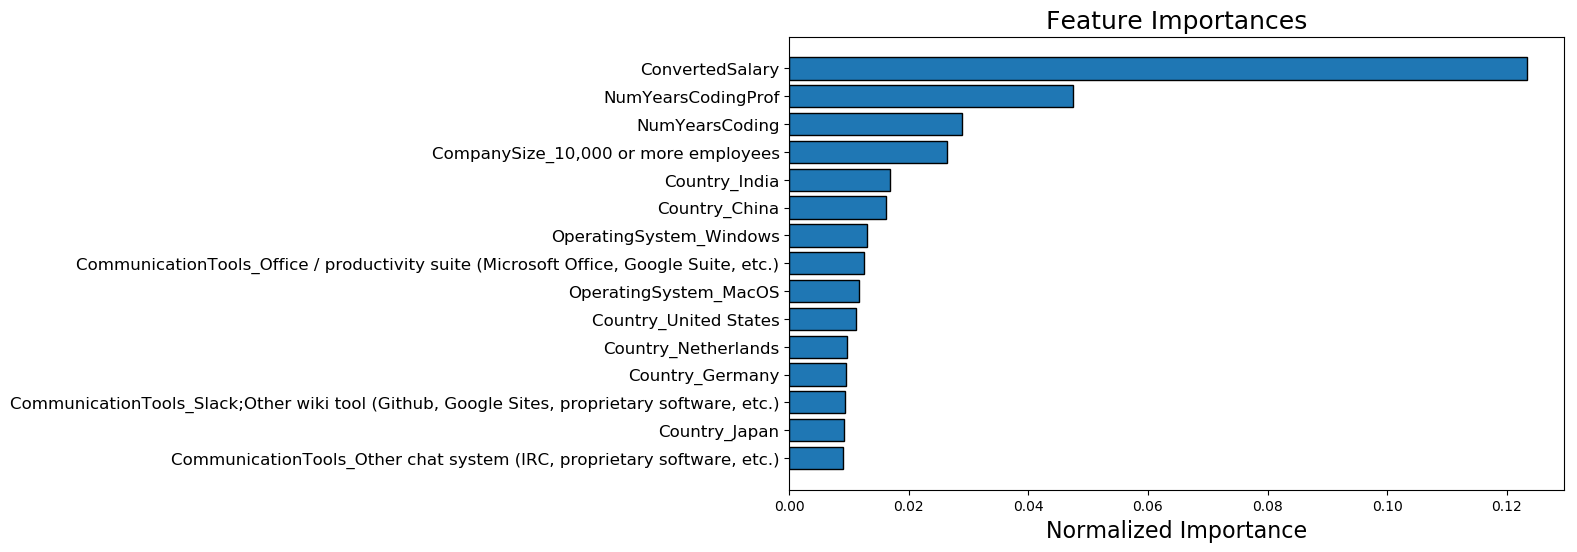

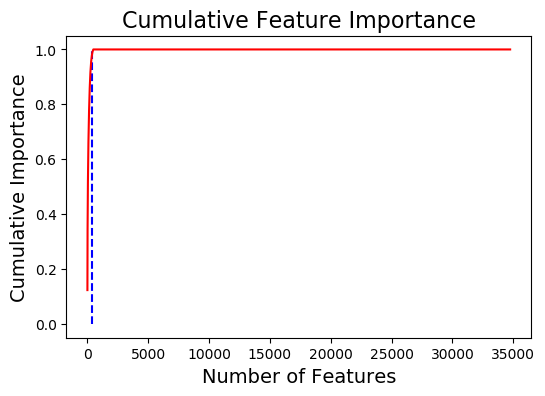

411 features required for 0.99 of cumulative importance


In [43]:
# Plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [44]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,ConvertedSalary,275.333333,0.123468,0.123468
1,NumYearsCodingProf,106.000000,0.047534,0.171001
2,NumYearsCoding,64.333333,0.028849,0.199851
3,"CompanySize_10,000 or more employees",58.666667,0.026308,0.226158
4,Country_India,37.666667,0.016891,0.243049
5,Country_China,36.000000,0.016143,0.259193
6,OperatingSystem_Windows,29.000000,0.013004,0.272197
7,CommunicationTools_Office / productivity suite...,28.000000,0.012556,0.284753
8,OperatingSystem_MacOS,26.000000,0.011659,0.296413
9,Country_United States,25.000000,0.011211,0.307623


##### Insight:
* Salary is the most importance feature for job satisfaction.
* Coding experiences are also importance.
* Working in a large company may make developers happier.

## Conclusions
* Different countries have different technology preferences and this should be an important aspect to consider if you want to work as a software developer in another country. 
* In the meantime, salaries vary from country to country. However, choosing a place to work is not only about salaries. We should also consider the cost of living and rent. There are countries that have salary levels higher than average but not so high costs of living. 
* Finally, the real purpose of life should be the happiness we feel when and live and work. Although salary is indeed the most important factor of higher job satisfaction, we might want to choose a larger company or a happier country to work at.
